# Курсовая работа
### Библиотеки python. Продолжение.

В курсовой работе нужно предсказать исполнение кредитного обязательства <b>Credit Default</b>


Мы имеем следующие признаки:

<b>Home Ownership</b> - владение недвижимостью<br>
<b>Annual Income</b> - ежегодный доход<br>
<b>Years in current job</b> - стаж работы на послденем месте в месяцах<br>
<b>Tax Liens</b> - налоговый залог<br>
<b>Number of Open Accounts</b> - количество открытых счетов<br>
<b>Years of Credit History</b> - кредитная история в годах<br>
<b>Maximum Open Credit</b> - максимальная кредитная сумма<br>
<b>Number of Credit Problems</b> - количество кредитных неудач<br>
<b>Months since last delinquent</b> - сколько месяцев прошло с момента последней просрочки<br>
<b>Bankruptcies</b> - банкротства<br>
<b>Purpose</b> - цель кредита<br>
<b>Term</b> - срок кредитования<br>
<b>Current Loan Amount</b> - текущая сумма кредита<br>
<b>Current Credit Balance</b> - текущий кредитовый остаток<br>
<b>Monthly Debt</b> - ежемесячная обязательная выплата<br>
<b>Credit Score</b> - кредитный счет<br>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
df_train = pd.read_csv("train.csv", delimiter=",")
df_test = pd.read_csv("test.csv", delimiter=",")

In [84]:
df_train.head(2)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1


In [85]:
df_test.head(2)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0


### Разузнаем побольше о df_train

In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [87]:
df_train.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [88]:
def type_counter(df: pd.core.frame.DataFrame, type_: str):
    """
    Функция подсчитывает уникальные значения 
    для всех колонок датафрейма заранее определенного типа, 
    и выводит их.
    """
    for col in df.select_dtypes(include=type_).columns:
        print(col)
        print('-' * 40)
        print(df[col].value_counts())
        print('*' * 80)
        print()

In [89]:
type_counter(df_train, 'object')

Home Ownership
----------------------------------------
Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
********************************************************************************

Years in current job
----------------------------------------
10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
********************************************************************************

Purpose
----------------------------------------
debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding          

In [90]:
type_counter(df_train, 'int64')

Credit Default
----------------------------------------
0    5387
1    2113
Name: Credit Default, dtype: int64
********************************************************************************



In [91]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


#### Что было замечено при первичном осмотре данных:
    1) Пропущенные значения в колонках 'Annual Income', 'Years in current job', 'Months since last delinquent', 'Bankruptcies', 'Credit Score'.
    2) Классы целевой переменной несбалансированы.
    3) Вызывают подозрения максимальные значения колонок 'Maximum Open Credit', 'Current Loan Amount', 'Monthly Debt', 'Credit Score'.


In [92]:
df_train.shape, df_test.shape 

((7500, 17), (2500, 16))

In [93]:
type_counter(df_train, 'float64')

Annual Income
----------------------------------------
1161660.0    4
1058376.0    4
1338113.0    4
1043651.0    4
969475.0     4
            ..
1141254.0    1
7907382.0    1
1534478.0    1
972040.0     1
1654786.0    1
Name: Annual Income, Length: 5478, dtype: int64
********************************************************************************

Tax Liens
----------------------------------------
0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64
********************************************************************************

Number of Open Accounts
----------------------------------------
9.0     728
11.0    692
10.0    677
8.0     638
7.0     613
12.0    562
6.0     504
13.0    465
14.0    420
5.0     325
15.0    313
16.0    265
17.0    232
4.0     212
18.0    143
19.0    139
3.0      95
20.0     93
21.0     78
23.0     59
24.0     50
22.0     49
25.0     32
2.0      28
28.0     14
27.0     14
26.0     12
30

In [94]:
type_counter(df_test, 'float64')

Annual Income
----------------------------------------
1237109.0    3
1025145.0    3
1328803.0    3
1214993.0    3
992351.0     2
            ..
641687.0     1
2304624.0    1
985758.0     1
1389888.0    1
1835495.0    1
Name: Annual Income, Length: 1929, dtype: int64
********************************************************************************

Tax Liens
----------------------------------------
0.0     2445
1.0       45
2.0        5
15.0       1
3.0        1
6.0        1
4.0        1
5.0        1
Name: Tax Liens, dtype: int64
********************************************************************************

Number of Open Accounts
----------------------------------------
9.0     245
8.0     223
10.0    218
11.0    211
12.0    204
6.0     183
13.0    178
7.0     176
14.0    159
5.0     106
15.0     97
16.0     81
17.0     66
4.0      63
18.0     52
19.0     46
20.0     37
21.0     29
3.0      29
22.0     26
23.0     17
27.0     10
24.0      9
2.0       7
30.0      6
25.0      6
26.0  

In [95]:
df_train[['Annual Income', 'Months since last delinquent', 'Credit Score']].describe()

,Annual Income,Months since last delinquent,Credit Score
count,5.943000e+03,3419.000000,5943.000000
mean,1.366392e+06,34.692600,1151.087498
std,8.453392e+05,21.688806,1604.451418
min,1.645970e+05,0.000000,585.000000
25%,8.443410e+05,16.000000,711.000000
50%,1.168386e+06,32.000000,731.000000
75%,1.640137e+06,50.000000,743.000000
max,1.014934e+07,118.000000,7510.000000


In [96]:
df_train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [97]:
df_train[['Annual Income', 'Years in current job', 'Months since last delinquent', 'Credit Score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Annual Income                 5943 non-null   float64
 1   Years in current job          7129 non-null   object 
 2   Months since last delinquent  3419 non-null   float64
 3   Credit Score                  5943 non-null   float64
dtypes: float64(3), object(1)
memory usage: 234.5+ KB


In [98]:
df_train[['Annual Income', 'Years in current job', 'Months since last delinquent', 'Bankruptcies', 'Credit Score']].isna().sum()

Annual Income                   1557
Years in current job             371
Months since last delinquent    4081
Bankruptcies                      14
Credit Score                    1557
dtype: int64

##### Из-за большого кол-ва пропусков видимо придется выкинуть признак 'Months since last delinquent', жаль(
##### 'Years in current job', 'Bankruptcies' заполним модой, а 'Annual Income' и 'Credit Score' медианой

In [99]:
def passes(df):
    """Функция первичной обработки данных"""
    df = df.drop(columns='Months since last delinquent')
    df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0], inplace=True)
    df['Years in current job'].fillna(df['Years in current job'].mode()[0], inplace=True)
    df['Annual Income'].fillna(df['Annual Income'].median(), inplace=True)
    df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)
    return df

In [100]:
df_train = passes(df_train)
df_train.isna().sum().sum()

0

**Dummies**

In [101]:
def dummies(df):
    """get_dummies and concat for all categories"""
    for cat_col in df.select_dtypes(include='object').columns:
        df = pd.concat([df, pd.get_dummies(df[cat_col], prefix=cat_col)], axis=1)
    return df

**Drop objects**

In [102]:
def drop_obj(df):
    return df.drop(list(df.select_dtypes(include='object').columns), axis=1)

In [103]:
def outliers(df):   
    df.loc[df['Maximum Open Credit'] > 10000000, 'Maximum Open Credit'] = df['Maximum Open Credit'].median()
    return df

In [104]:
df_train = dummies(df_train)
df_train = drop_obj(df_train)
df_train = outliers(df_train)
df_train.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,...,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,482087.0,0.0,11.0,26.3,685960.0,1.0,1.0,99999999.0,47386.0,7914.0,...,0,0,0,0,0,0,0,0,0,1
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,0.0,264968.0,394972.0,18373.0,...,0,0,0,0,0,0,0,0,1,0
2,751412.0,0.0,11.0,35.0,1182434.0,0.0,0.0,99999999.0,308389.0,13651.0,...,0,0,0,0,0,0,0,0,0,1
3,805068.0,0.0,8.0,22.5,147400.0,1.0,1.0,121396.0,95855.0,11338.0,...,0,0,0,0,0,0,0,0,0,1
4,776264.0,0.0,13.0,13.6,385836.0,1.0,0.0,125840.0,93309.0,7180.0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Annual Income                   7500 non-null   float64
 1   Tax Liens                       7500 non-null   float64
 2   Number of Open Accounts         7500 non-null   float64
 3   Years of Credit History         7500 non-null   float64
 4   Maximum Open Credit             7500 non-null   float64
 5   Number of Credit Problems       7500 non-null   float64
 6   Bankruptcies                    7500 non-null   float64
 7   Current Loan Amount             7500 non-null   float64
 8   Current Credit Balance          7500 non-null   float64
 9   Monthly Debt                    7500 non-null   float64
 10  Credit Score                    7500 non-null   float64
 11  Credit Default                  7500 non-null   int64  
 12  Home Ownership_Have Mortgage    75

### Займемся моделированием

In [109]:
def pipeline(df):
    """Функция первичной обработки"""
    df = passes(df)
    df = dummies(df)
    df = drop_obj(df)
    df = outliers(df)
    return(df)

In [110]:
X = df_train.drop(columns='Credit Default')
y = df_train['Credit Default']

In [111]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6000, 43), (1500, 43), (6000,), (1500,))

In [112]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                             accuracy_score, classification_report, plot_confusion_matrix, \
                             plot_precision_recall_curve, precision_recall_curve, recall_score,
                             plot_roc_curve)

In [113]:
%%time

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=2)

param_grid=[{
             'max_depth': range(1, 15), 
             'min_samples_leaf': range(1, 10), 
            }]

grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
tree = grid_search.best_estimator_

Wall time: 18.2 s


In [114]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 9}

In [115]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

pred_proba_test = tree.predict_proba(X_test)
pred_proba_test[:5]

array([[0.        , 1.        ],
       [0.74495848, 0.25504152],
       [0.71604938, 0.28395062],
       [0.74495848, 0.25504152],
       [1.        , 0.        ]])

### Подсчитаем метрики

In [116]:
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_train

0.7828333333333334

In [117]:
accuracy_test = accuracy_score(y_test, pred_test)
accuracy_test

0.7626666666666667

In [118]:
print(y_train.value_counts())
print(y_test.value_counts())

0    4328
1    1672
Name: Credit Default, dtype: int64
0    1059
1     441
Name: Credit Default, dtype: int64


In [119]:
4328/1672, 1059/441

(2.588516746411483, 2.401360544217687)

In [120]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1059
           1       0.75      0.29      0.41       441

    accuracy                           0.76      1500
   macro avg       0.76      0.62      0.63      1500
weighted avg       0.76      0.76      0.72      1500



In [121]:
from sklearn.metrics import f1_score

f1_raw = f1_score(y_test, pred_test)
f1_raw

0.4144736842105263

In [122]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,...,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7.500000e+03,7.500000e+03,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000
mean,1.325286e+06,0.030133,11.130933,18.317467,6.433482e+05,0.170000,0.116933,1.187318e+07,2.898332e+05,18314.454133,...,0.009467,0.001467,0.088667,0.000267,0.003467,0.004933,0.001067,0.00200,0.259200,0.740800
std,7.567551e+05,0.271604,4.908924,7.041946,6.743494e+05,0.498598,0.346904,3.192612e+07,3.178714e+05,11926.764673,...,0.096842,0.038272,0.284281,0.016329,0.058780,0.070069,0.032645,0.04468,0.438225,0.438225
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,9.311330e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781535e+05,0.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
75%,1.499974e+06,0.000000,14.000000,21.800000,7.905590e+05,0.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,9.541136e+06,7.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


##### F1-мера ниже 0.50, так что работаем дальше)

Оценим гистограммы фичей

In [123]:
FEATURES_FOR_HIST = ['Annual Income', 'Bankruptcies', 'Current Credit Balance', 'Monthly Debt', \
                     'Number of Credit Problems', 'Number of Open Accounts', 'Tax Liens', \
                     'Years of Credit History', 'Credit Score', 'Current Loan Amount', 'Maximum Open Credit']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CCF05B0>,
      dtype=object)

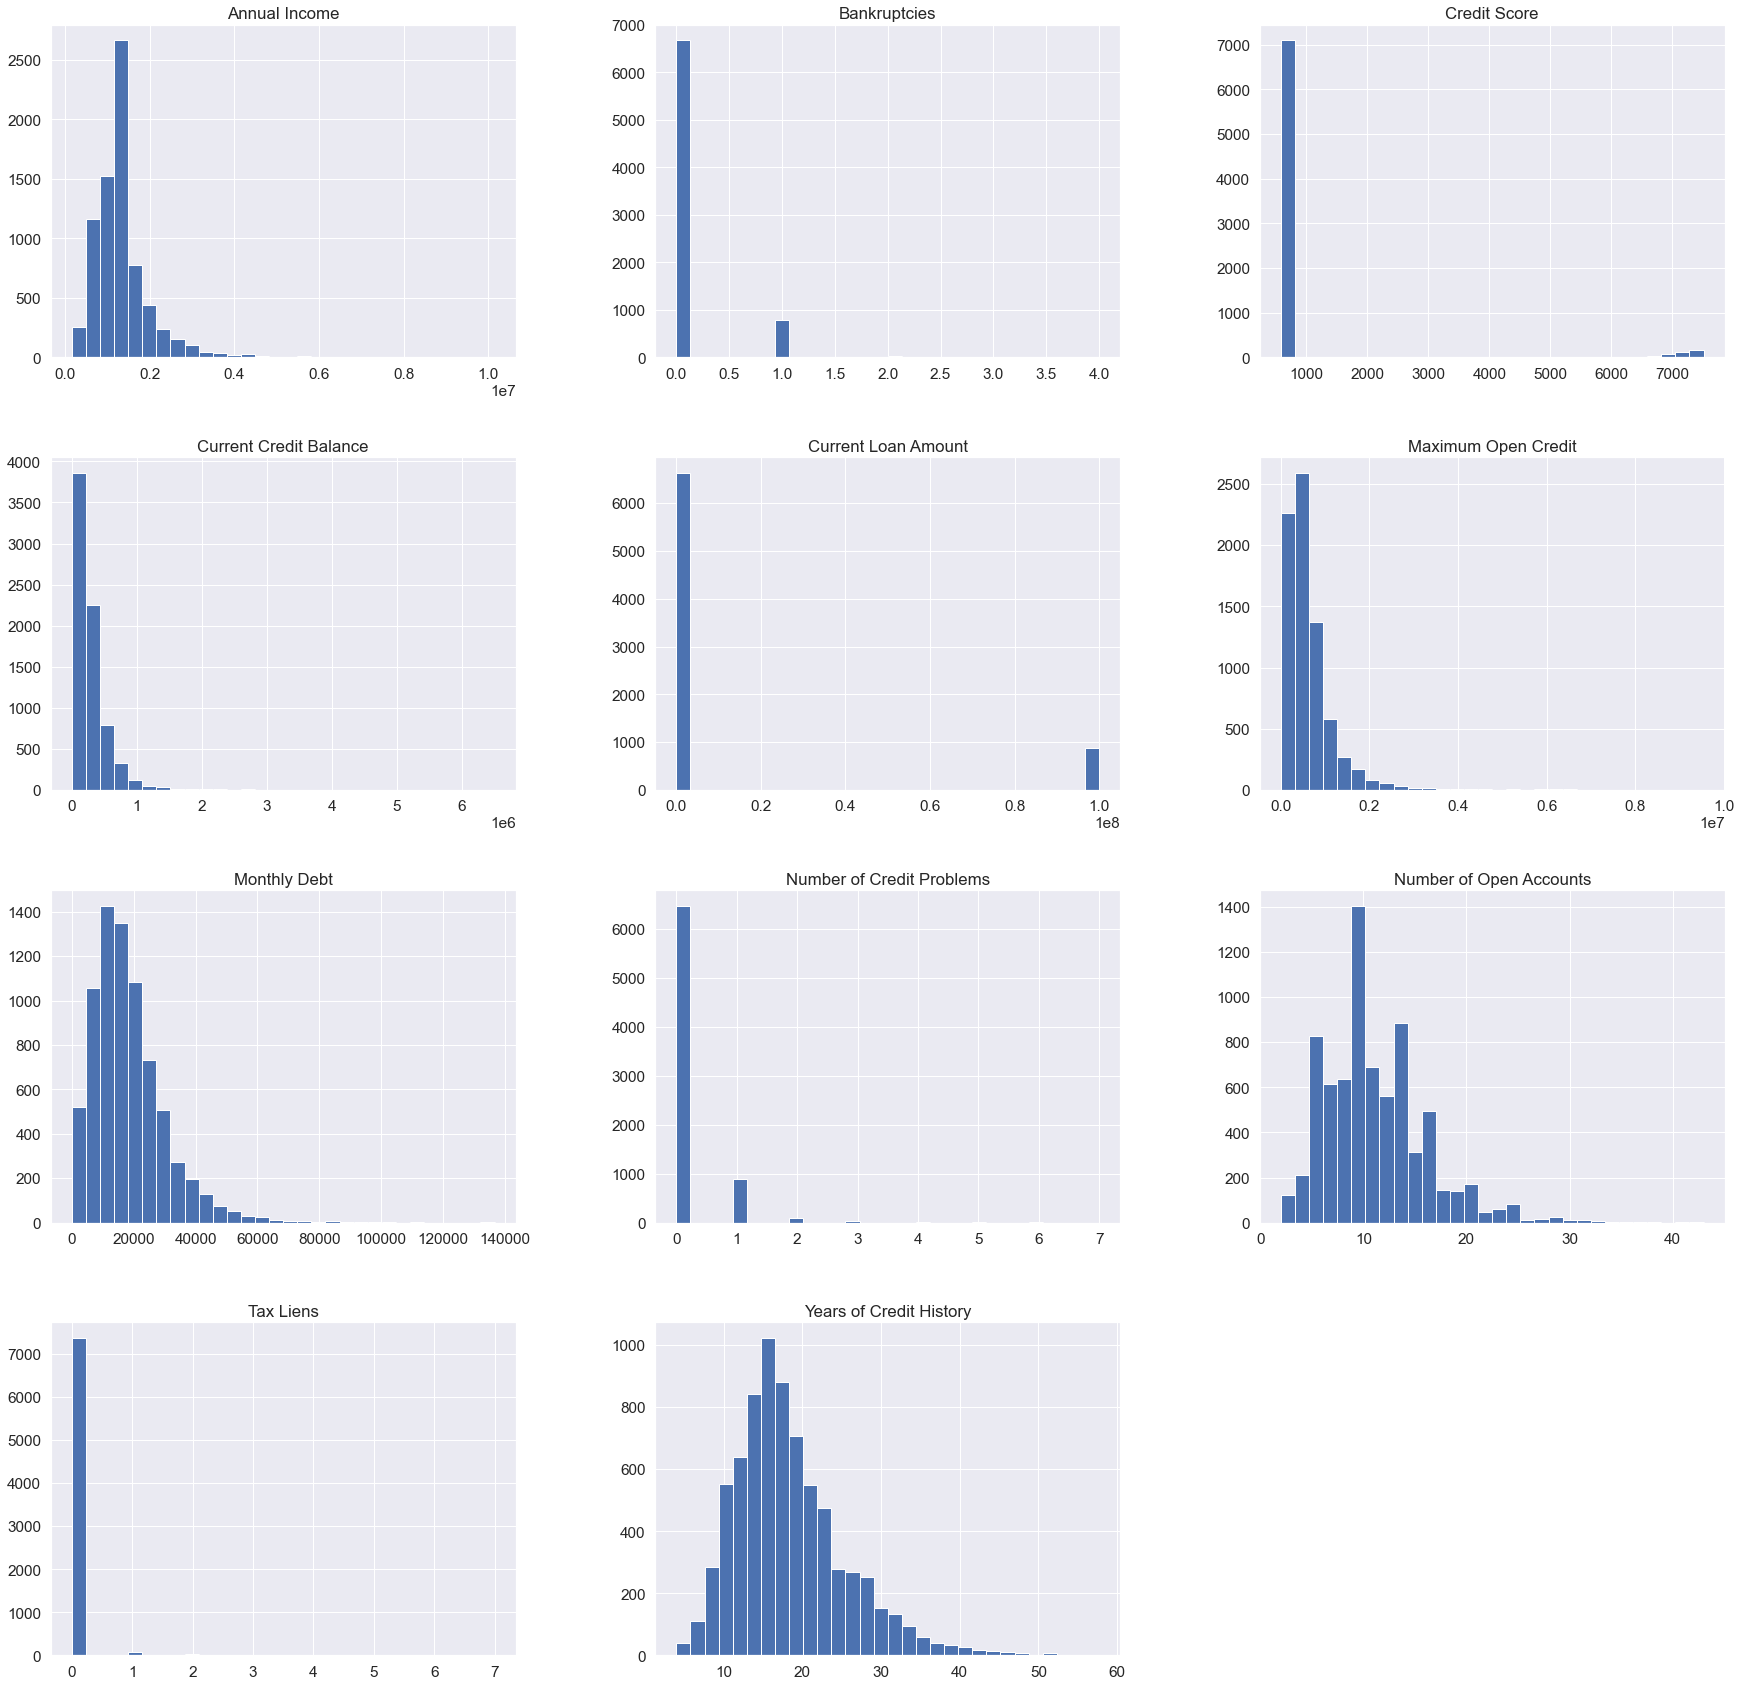

In [124]:
df_train[FEATURES_FOR_HIST].hist(figsize=(30, 30), bins=30, grid=True)

Посмотрим поближе на 'Current Loan Amount', 'Credit Score', 'Maximum Open Credit', 'Monthly Debt'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CB18070>,
      dtype=object)

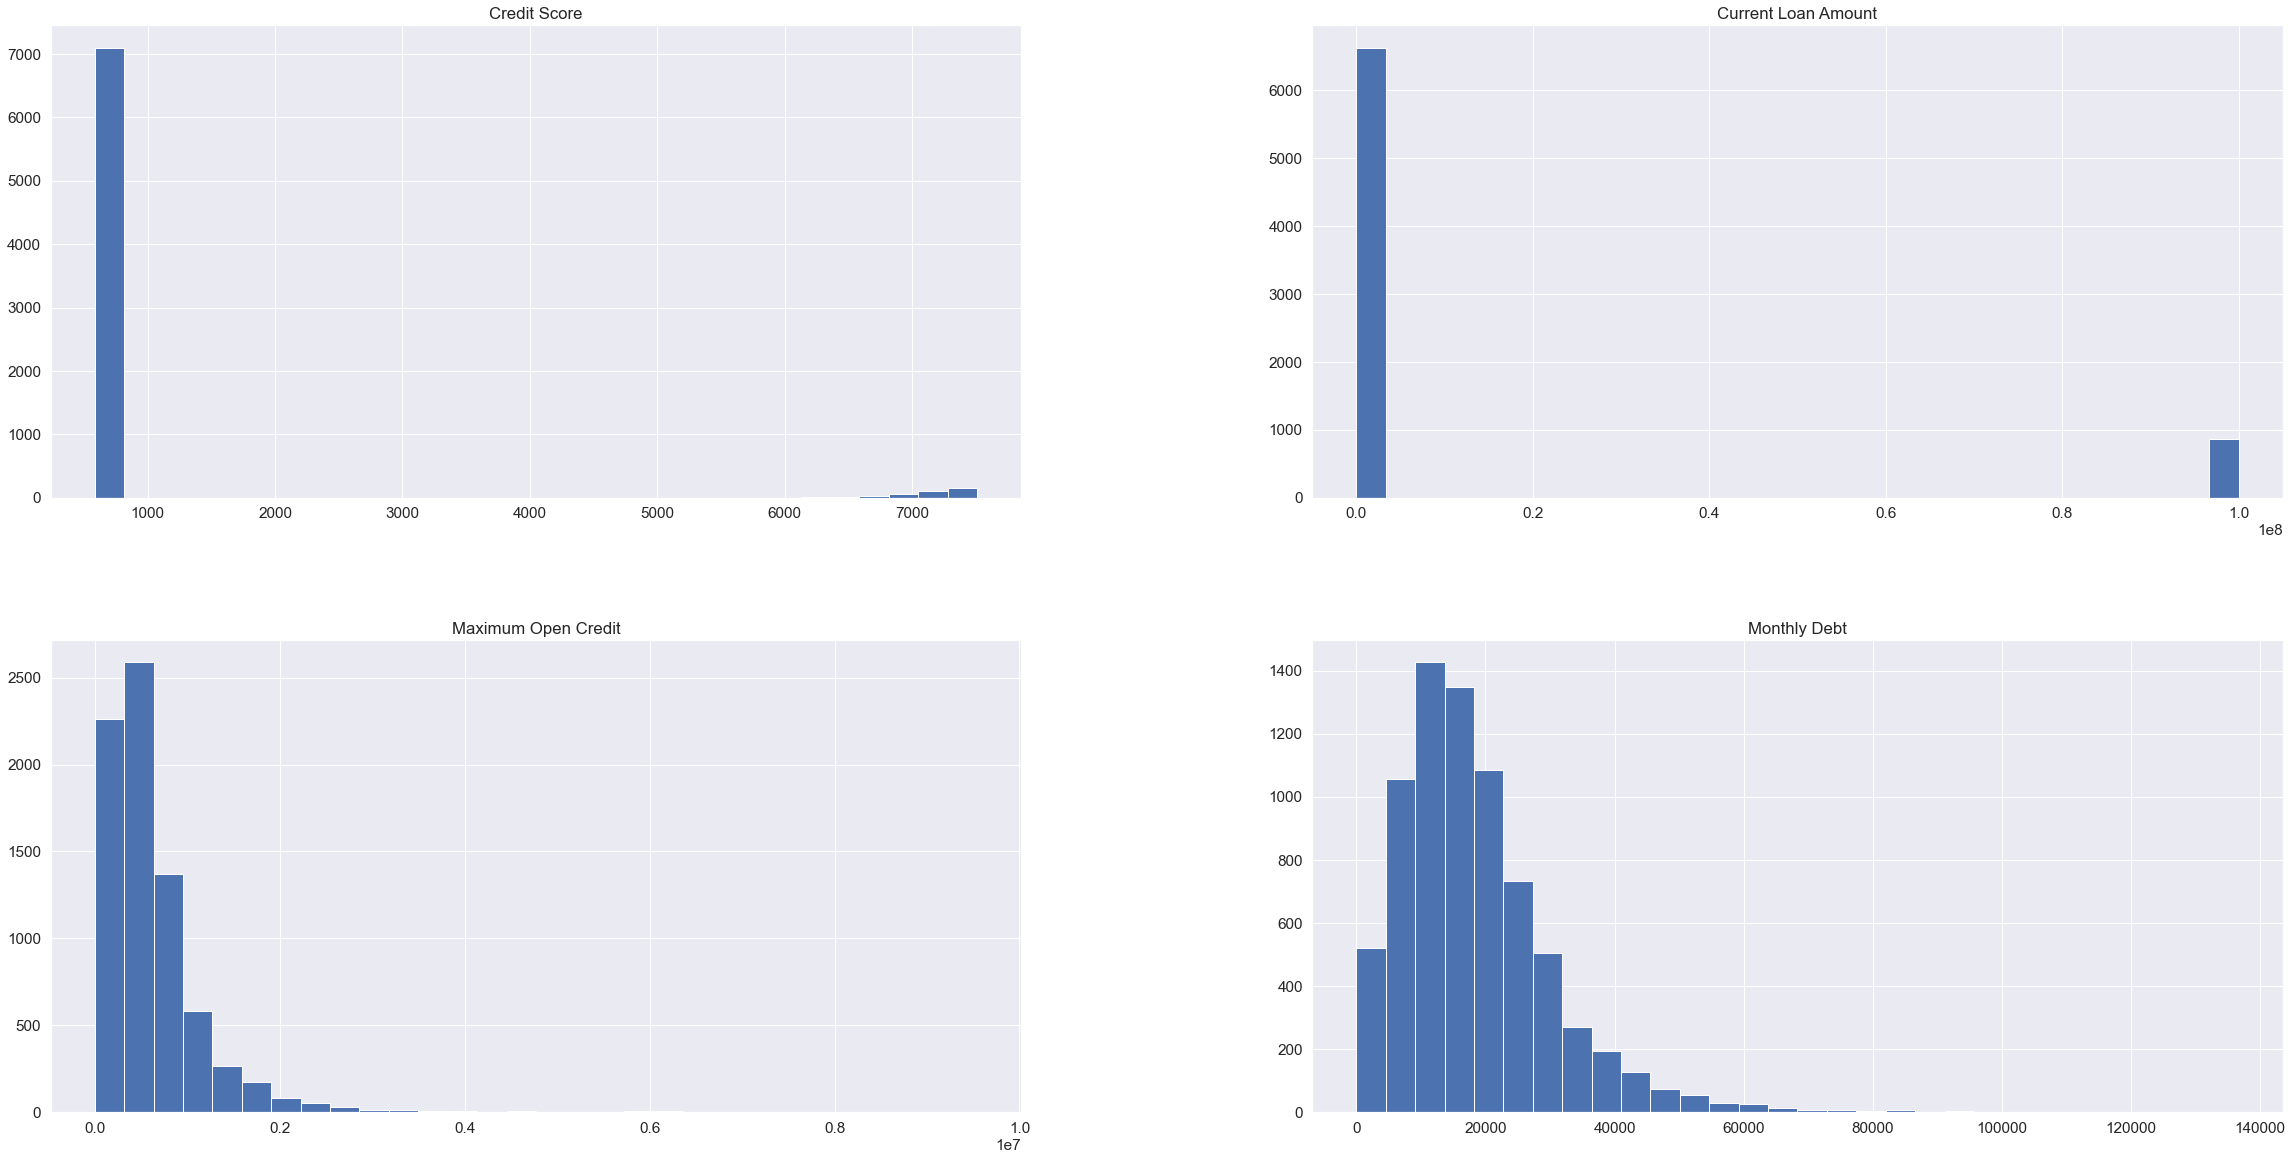

In [125]:
FEATURES_FOR_HIST2 = ['Current Loan Amount', 'Credit Score', 'Maximum Open Credit', 'Monthly Debt']

df_train[FEATURES_FOR_HIST2].hist(figsize=(40, 20), bins=30, grid=True)

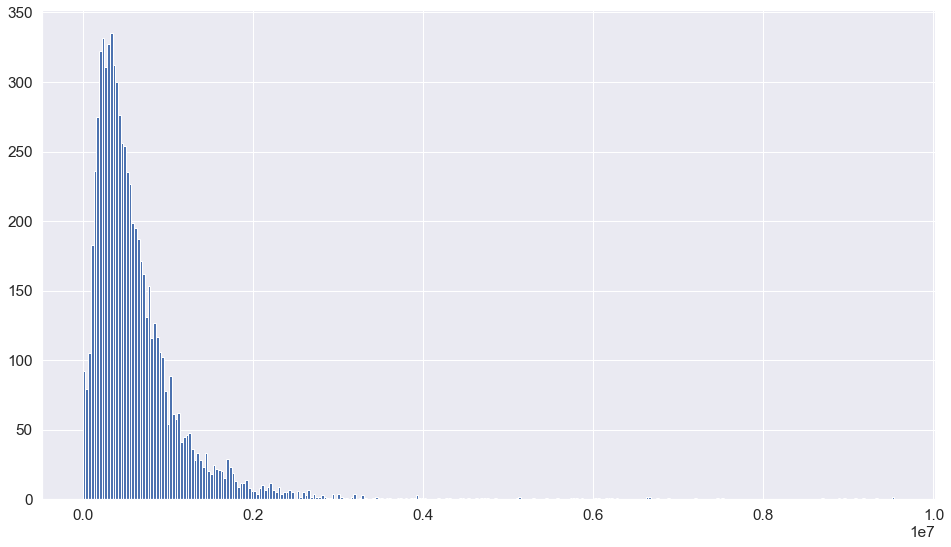

In [126]:
df_train['Maximum Open Credit'].hist(figsize=(16, 9), bins=300, grid=True)

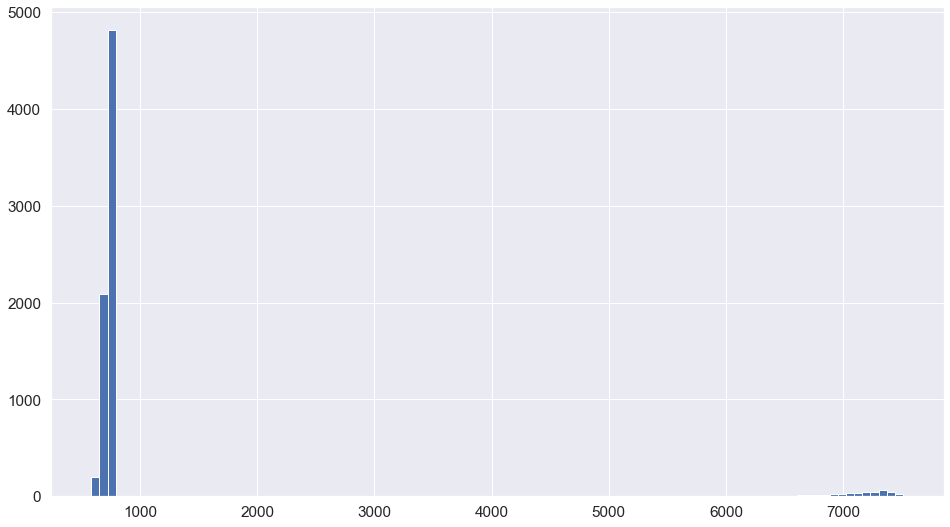

In [127]:
df_train['Credit Score'].hist(figsize=(16, 9), bins=100, grid=True)

Распределение выглядит неоднозначно(  Поработаем над этим

In [128]:
df_train.loc[df_train['Credit Score'] > 1000, 'Credit Score'].shape

(400,)

In [129]:
df_train.loc[df_train['Credit Score'] > 6000, 'Credit Score'].shape

(400,)

In [130]:
df_train.loc[df_train['Credit Score'] < 1000, 'Credit Score'].shape

(7100,)

Присутствует огромный промежуток несуществующих значений между 1000 и 6000.

In [131]:
df_train['Credit Score'].describe()

count    7500.000000
mean     1063.877333
std      1438.335832
min       585.000000
25%       718.000000
50%       731.000000
75%       740.000000
max      7510.000000
Name: Credit Score, dtype: float64

In [132]:
TARGET_NAME = 'Credit Default'
BASE_FEATURES = list(df_train.columns.drop(TARGET_NAME))

In [133]:
credit_score_under = df_train.loc[df_train['Credit Score'] < 1000, ['Credit Score', TARGET_NAME]]
credit_score_over = df_train.loc[df_train['Credit Score'] > 1000, ['Credit Score', TARGET_NAME]]
credit_score_under.shape, credit_score_over.shape

((7100, 2), (400, 2))

In [134]:
credit_score_under[TARGET_NAME].value_counts()

0    5387
1    1713
Name: Credit Default, dtype: int64

In [135]:
credit_score_over[TARGET_NAME].value_counts()

1    400
Name: Credit Default, dtype: int64

Вывод: <br>
    Скорее всего это не выбросы. Такая закономерность говорит о том, что клиенты с большими кредитными суммами, не выполняют вовремя своих кредитных обязательств.

#### Проверим корреляцию базовых признаков с целевым признаком

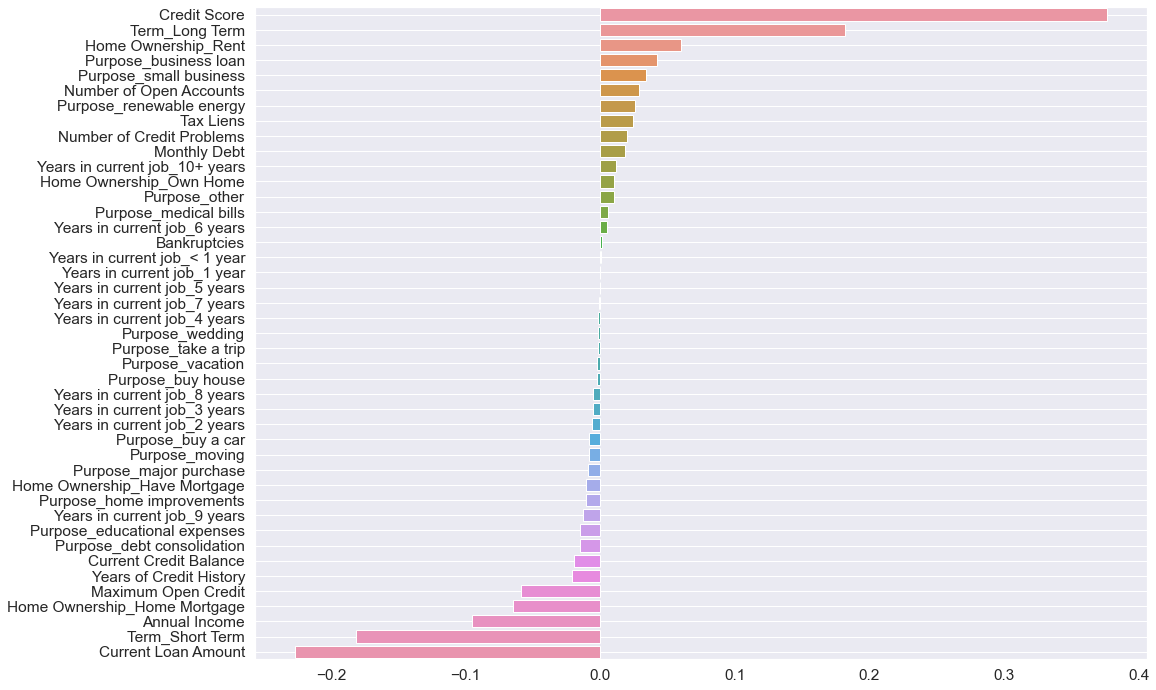

In [136]:
target_corr = df_train[BASE_FEATURES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(16, 12))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.grid()
plt.show()


#### Оценим несколько признаков в разрезе целевой переменной

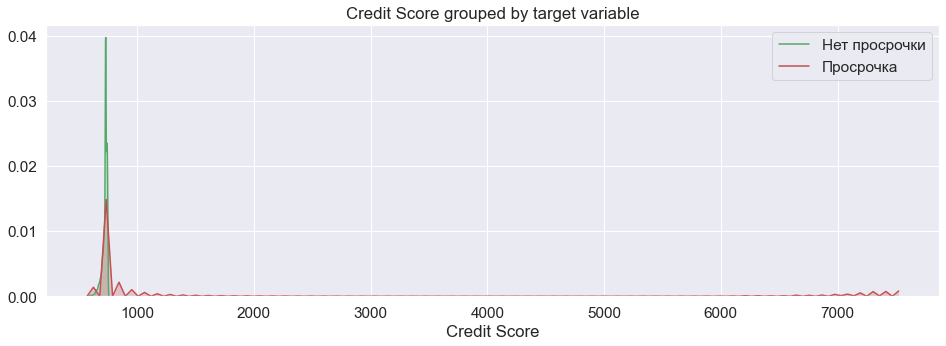

In [137]:
credit_score_with_target = df_train[['Credit Score', TARGET_NAME]]
credit_score = df_train['Credit Score']
credit_score_target_0 = credit_score[credit_score_with_target[TARGET_NAME] == 0]
credit_score_target_1 = credit_score[credit_score_with_target[TARGET_NAME] == 1]

plt.figure(figsize=(16, 5))

sns.kdeplot(credit_score_target_0, shade=True, label='Нет просрочки', color='g')
sns.kdeplot(credit_score_target_1, shade=True, label='Просрочка', color='r')

plt.xlabel('Credit Score')
plt.title('Credit Score grouped by target variable')
plt.show()

In [138]:
from scipy.stats import shapiro

shapiro(credit_score)

C:\Users\1\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.2491898536682129, pvalue=0.0)

Посчитаем без завышенных кредитных долгов

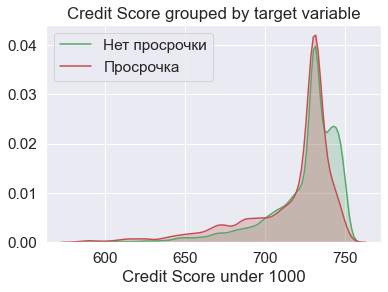

In [139]:
credit_score_under_target_0 = credit_score_under[credit_score_under[TARGET_NAME] == 0]
credit_score_under_target_1 = credit_score_under[credit_score_under[TARGET_NAME] == 1]

sns.kdeplot(credit_score_under_target_0['Credit Score'], shade=True, label='Нет просрочки', color='g')
sns.kdeplot(credit_score_under_target_1['Credit Score'], shade=True, label='Просрочка', color='r')

plt.xlabel('Credit Score under 1000')
plt.title('Credit Score grouped by target variable')
plt.show()

In [140]:
shapiro(credit_score_under['Credit Score'])

C:\Users\1\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7988221645355225, pvalue=0.0)

In [141]:
if shapiro(credit_score_under['Credit Score'])[1] < 0.05:
    print('Мы наблюдаем отсутствие нормального распеределения данных')
else:
    print('Мы наблюдаем нормальное распеределение данных')

Мы наблюдаем отсутствие нормального распеределения данных


In [142]:
from scipy.stats import mannwhitneyu

mannwhitneyu(credit_score_target_0, credit_score_target_1)

MannwhitneyuResult(statistic=5561823.5, pvalue=0.06128186726211274)

In [143]:
if mannwhitneyu(credit_score_target_0, credit_score_target_1)[1] < 0.05:
    print('Мы не наблюдаем равность мат. ожидания')
else:
    print('Мы наблюдаем равность мат. ожидания')

Мы наблюдаем равность мат. ожидания


In [144]:
mannwhitneyu(credit_score_under_target_0['Credit Score'], credit_score_under_target_1['Credit Score'])

MannwhitneyuResult(statistic=3666107.5, pvalue=1.9926314536763396e-38)

In [145]:
if mannwhitneyu(credit_score_under_target_0['Credit Score'], credit_score_under_target_1['Credit Score'])[1] < 0.05:
    print('Мы не наблюдаем равность мат. ожидания')
else:
    print('Мы наблюдаем равность мат. ожидания')

Мы не наблюдаем равность мат. ожидания


Построим доверительные интервалы для средних значений, каждой из двух групп и сравним их

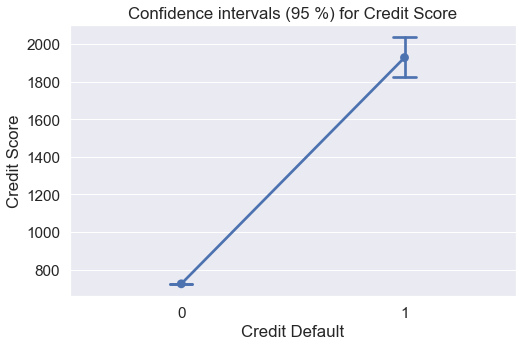

In [146]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Credit Score', data=credit_score_with_target, capsize=.1)

plt.title('Confidence intervals (95 %) for Credit Score')
plt.show()

По данному графику так же видно, что интервалы, в которых с 95% вероятностью должны находится истинные мат. ожидания этих двух групп, не пересекаются, что подтверждает результаты полученные с помощью критерия Манна-Уитни.

Это означает, что группы из которых взяты данные выборки, с допускаемой нами вероятностью (95%), имеют различные распределения и этот признак может быть полезен для определения значения целевой переменной.

 Теперь оценим Current Loan Amount

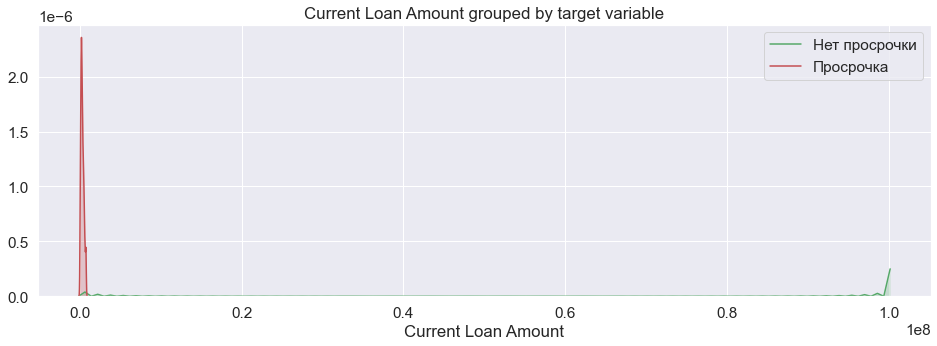

In [147]:
Current_Loan_Amount_with_target = df_train[['Current Loan Amount', TARGET_NAME]]
Current_Loan_Amount = df_train['Current Loan Amount']
Current_Loan_Amount_0 = Current_Loan_Amount[Current_Loan_Amount_with_target[TARGET_NAME] == 0]
Current_Loan_Amount_1 = Current_Loan_Amount[Current_Loan_Amount_with_target[TARGET_NAME] == 1]

plt.figure(figsize=(16, 5))

sns.kdeplot(Current_Loan_Amount_0, shade=True, label='Нет просрочки', color='g')
sns.kdeplot(Current_Loan_Amount_1, shade=True, label='Просрочка', color='r')

plt.xlabel('Current Loan Amount')
plt.title('Current Loan Amount grouped by target variable')
plt.show()

Картина напоминает предыдущую

In [148]:
shapiro(Current_Loan_Amount)

C:\Users\1\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.37670987844467163, pvalue=0.0)

In [149]:
mannwhitneyu(Current_Loan_Amount_0, Current_Loan_Amount_1)

MannwhitneyuResult(statistic=5169258.0, pvalue=2.923443678733522e-10)

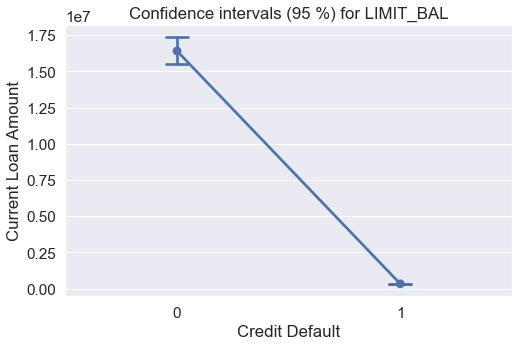

In [150]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Current Loan Amount', data=Current_Loan_Amount_with_target, capsize=.1)

plt.title('Confidence intervals (95 %) for LIMIT_BAL')
plt.show()

#### Взглянем на матрицу корреляций

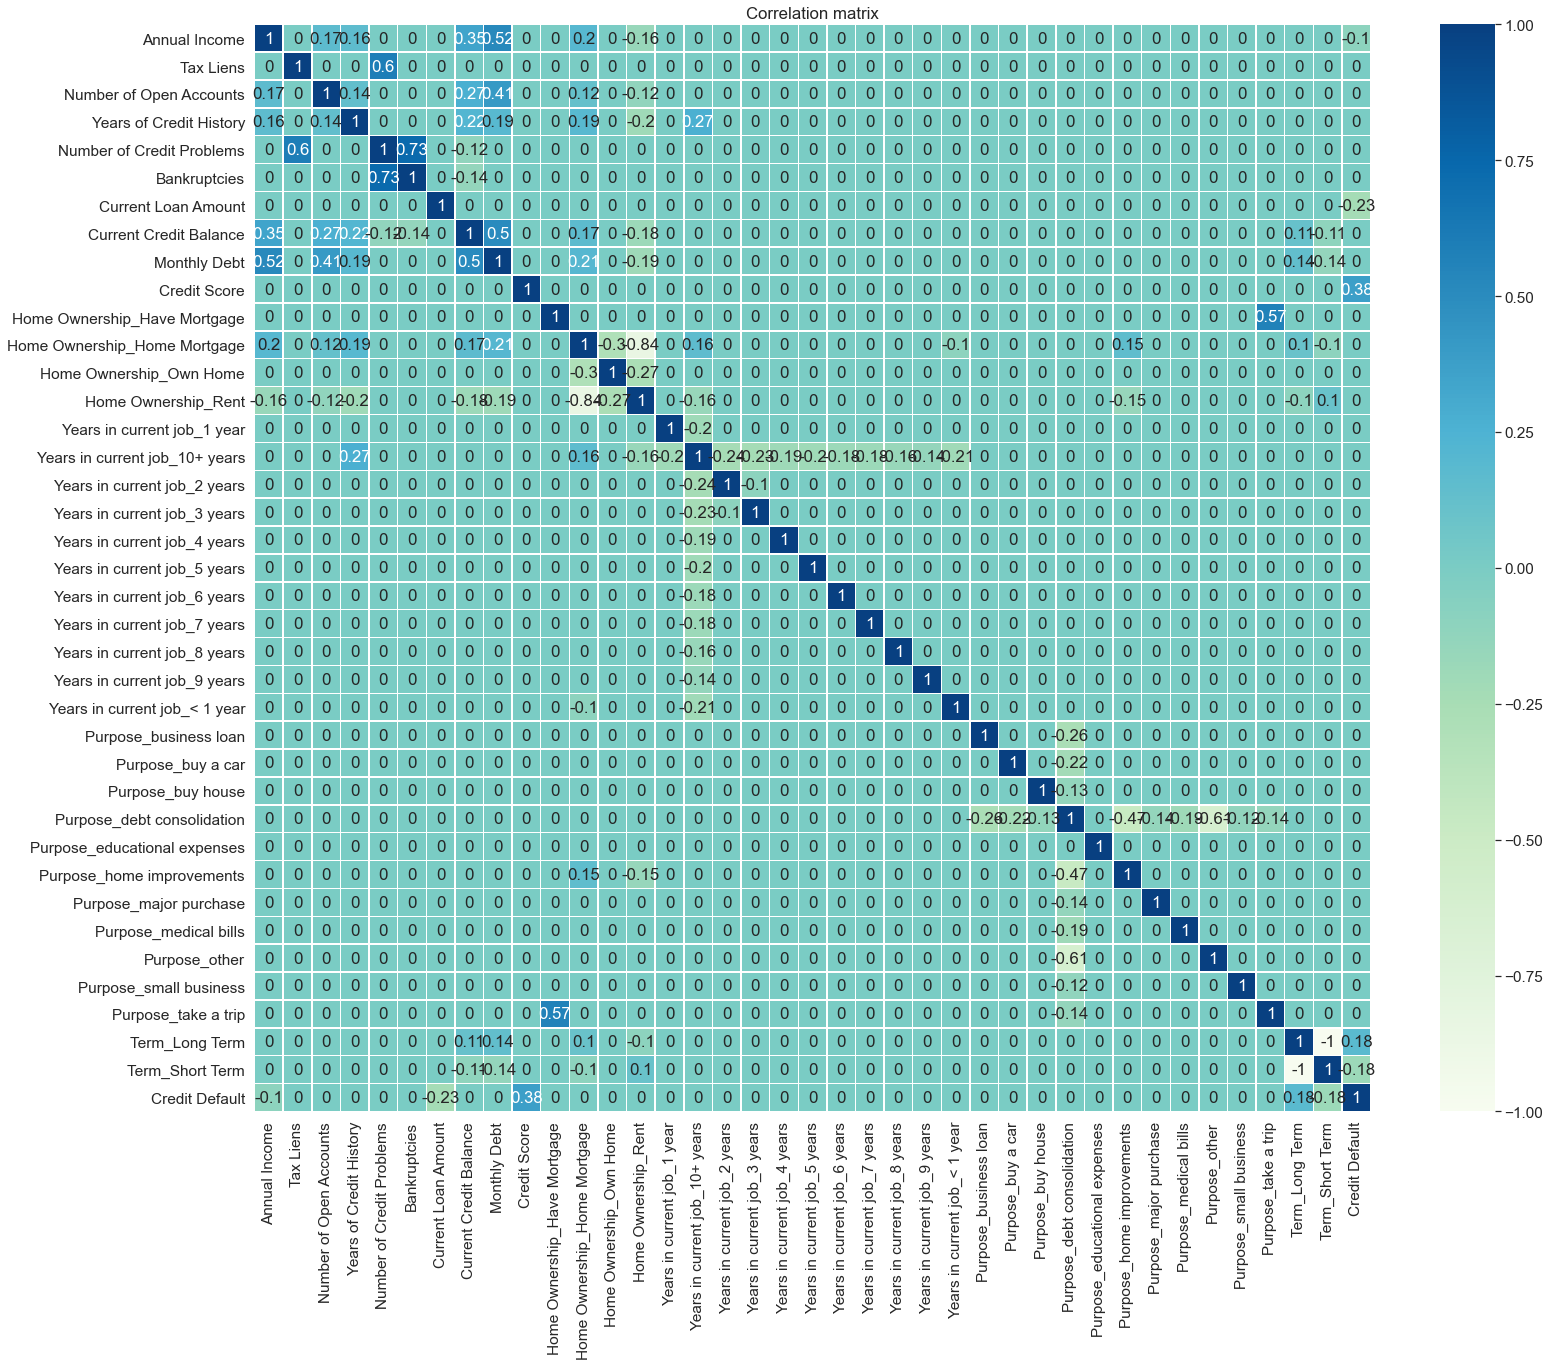

In [151]:
# to_drop - признаки, которые вообще нисчем кроме себя не коррелируют
to_drop = ['Maximum Open Credit', 'Purpose_moving', 'Purpose_renewable energy', 'Purpose_vacation', 'Purpose_wedding']

plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)

corr_matrix = df_train[BASE_FEATURES + [TARGET_NAME]].drop(to_drop, axis=1).corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

### Попробуем обучить модель только на фичах с высокой корреляцией

In [152]:
# фичи с высокой положительной корреляцией в порядке убывания
high_plus_corr_features = ['Credit Score', 'Term_Long Term', 'Home Ownership_Rent', 'Purpose_business loan', \
                           'Purpose_small business', 'Number of Open Accounts', 'Purpose_renewable energy', \
                           'Tax Liens', 'Number of Credit Problems', 'Monthly Debt']

# фичи с высокой отрицательной корреляцией в порядке убывания
high_minus_corr_features = ['Current Loan Amount', 'Term_Short Term', 'Annual Income', \
                            'Home Ownership_Home Mortgage', 'Maximum Open Credit']

df_train_cut = df_train[high_plus_corr_features + high_minus_corr_features + [TARGET_NAME]]

In [153]:
X = df_train_cut.drop(TARGET_NAME, axis=1)
y = df_train_cut[TARGET_NAME]

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

tree = DecisionTreeClassifier(random_state=2)

param_grid=[{
             'max_depth': range(1, 15), 
             'min_samples_leaf': range(1, 10), 
            }]

grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
tree = grid_search.best_estimator_
pred_test = tree.predict(X_test)

print('Нынешний результат -', f1_score(y_test, pred_test))
print('Предыдущий результат -', f1_raw)

Нынешний результат - 0.4260162601626016
Предыдущий результат - 0.4144736842105263


###### Результат чуть лучше чем вначале исследований,
###### но теперь попробуем пожонглировать комбинациями наших фичей выкидывая некоторые из них.
###### Для этого запустим наше обучение несколько раз в цикле с наборами данных из разных фичей.

In [154]:
def choose_best_tree(df):
    
    X = df.drop(TARGET_NAME, axis=1)
    y = df[TARGET_NAME]

    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

    tree = DecisionTreeClassifier(random_state=2)

    param_grid=[{
                 'max_depth': range(1, 15), 
                 'min_samples_leaf': range(1, 10), 
                }]

    grid_search = GridSearchCV(tree, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    tree = grid_search.best_estimator_
    pred_test = tree.predict(X_test)
    
    print('*' * 50)
    print(X.columns)
    print(grid_search.best_params_)
    print('F1-мера -', f1_score(y_test, pred_test))
    print()
  

    
for i in range(len(high_plus_corr_features) - 3):
    for k in range(len(high_minus_corr_features) - 2):
        
        if i == 0 and k == 0:
            df_train_cut_cut = df_train[high_plus_corr_features + high_minus_corr_features + [TARGET_NAME]]
            choose_best_tree(df_train_cut_cut)
            
        if i == 0 and k != 0:
            df_train_cut_cut = df_train[high_plus_corr_features + high_minus_corr_features[:-k] + [TARGET_NAME]]
            choose_best_tree(df_train_cut_cut)            
            
        if i != 0 and k == 0:
            df_train_cut_cut = df_train[high_plus_corr_features[:-i] + high_minus_corr_features + [TARGET_NAME]]
            choose_best_tree(df_train_cut_cut)
        
        if i != 0 and k != 0:
            df_train_cut_cut = df_train[high_plus_corr_features[:-i] + high_minus_corr_features[:-k] + [TARGET_NAME]]
            choose_best_tree(df_train_cut_cut)        

**************************************************
Index(['Credit Score', 'Term_Long Term', 'Home Ownership_Rent',
       'Purpose_business loan', 'Purpose_small business',
       'Number of Open Accounts', 'Purpose_renewable energy', 'Tax Liens',
       'Number of Credit Problems', 'Monthly Debt', 'Current Loan Amount',
       'Term_Short Term', 'Annual Income', 'Home Ownership_Home Mortgage',
       'Maximum Open Credit'],
      dtype='object')
{'max_depth': 6, 'min_samples_leaf': 9}
F1-мера - 0.4260162601626016

**************************************************
Index(['Credit Score', 'Term_Long Term', 'Home Ownership_Rent',
       'Purpose_business loan', 'Purpose_small business',
       'Number of Open Accounts', 'Purpose_renewable energy', 'Tax Liens',
       'Number of Credit Problems', 'Monthly Debt', 'Current Loan Amount',
       'Term_Short Term', 'Annual Income', 'Home Ownership_Home Mortgage'],
      dtype='object')
{'max_depth': 1, 'min_samples_leaf': 1}
F1-мера - 0.326375

**************************************************
Index(['Credit Score', 'Term_Long Term', 'Home Ownership_Rent',
       'Purpose_business loan', 'Current Loan Amount', 'Term_Short Term',
       'Annual Income'],
      dtype='object')
{'max_depth': 1, 'min_samples_leaf': 1}
F1-мера - 0.32637571157495254



На базовой модели DecisionTreeClassifier лучшие результаты получились такими:
<br><br>
**BEST FEATURES:**<br>
'Credit Score'<br> 
'Term_Long Term'<br> 
'Home Ownership_Rent'<br>
'Purpose_business loan'<br> 
'Purpose_small business'<br>
'Number of Open Accounts'<br> 
'Current Loan Amount'<br>
'Term_Short Term'<br>
'Annual Income'<br><br>
{'max_depth': 7, 'min_samples_leaf': 5}<br>
F1-мера - 0.45731707317073167

### Проведем стандартизацию данных и посмотрит как пройдет обучение

In [158]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_norm = df_train_cut.copy()
df_norm = scaler.fit_transform(df_norm)
df_norm = pd.DataFrame(df_norm, columns=[df_train_cut.columns.to_list()])

num_features = ['Credit Score', 'Number of Open Accounts', 'Monthly Debt',
                'Current Loan Amount', 'Annual Income', 'Maximum Open Credit']

df_train_cut_norm = df_train_cut.copy()
df_train_cut_norm[num_features] = df_norm[num_features]

df_train_cut_norm.head()

,Credit Score,Term_Long Term,Home Ownership_Rent,Purpose_business loan,Purpose_small business,Number of Open Accounts,Purpose_renewable energy,Tax Liens,Number of Credit Problems,Monthly Debt,Current Loan Amount,Term_Short Term,Annual Income,Home Ownership_Home Mortgage,Maximum Open Credit,Credit Default
0,-0.218932,0,0,0,0,-0.026674,0,0.0,1.0,-0.872085,2.760520,1,-1.114304,0,0.063194,0
1,-0.227276,1,0,0,0,0.788223,0,0.0,0.0,0.004909,-0.363620,0,-0.396190,0,0.798425,1
2,-0.223799,0,0,0,0,-0.026674,0,0.0,0.0,-0.391034,2.760520,1,-0.758385,1,0.799469,0
3,-0.257174,0,0,0,0,-0.637847,0,0.0,1.0,-0.584980,-0.368118,1,-0.687478,0,-0.735496,0
4,-0.239791,0,1,0,0,0.380774,0,0.0,1.0,-0.933631,-0.367978,1,-0.725543,0,-0.381893,0
5,-0.231448,1,1,0,0,0.177050,0,0.0,0.0,0.031657,-0.361354,0,-0.207346,0,-0.410147,1
6,-0.221714,0,0,0,0,-0.434123,0,0.0,0.0,-1.341397,2.760520,1,0.245568,1,-0.378500,0
7,-0.249525,0,1,0,0,0.380774,0,0.0,0.0,0.121294,-0.364061,1,-0.376931,0,-0.464144,1
8,-0.231448,0,0,0,0,1.195671,0,0.0,1.0,-1.534253,-0.367856,1,-0.207346,1,-0.954092,0
9,-0.231448,1,0,0,0,-0.230398,0,0.0,0.0,-0.058817,-0.353975,0,-0.207346,1,-0.195826,1


In [161]:
for i in range(len(high_plus_corr_features) - 3):
    for k in range(len(high_minus_corr_features) - 2):
        
        if i == 0 and k == 0:
            df_train_cut_cut_norm = df_train_cut_norm[high_plus_corr_features + high_minus_corr_features + [TARGET_NAME]]
            choose_best_tree(df_train_cut_cut_norm)
            
        if i == 0 and k != 0:
            df_train_cut_cut_norm = df_train_cut_norm[high_plus_corr_features + high_minus_corr_features[:-k] + [TARGET_NAME]]
            choose_best_tree(df_train_cut_cut_norm)            
            
        if i != 0 and k == 0:
            df_train_cut_cut_norm = df_train_cut_norm[high_plus_corr_features[:-i] + high_minus_corr_features + [TARGET_NAME]]
            choose_best_tree(df_train_cut_cut_norm)
        
        if i != 0 and k != 0:
            df_train_cut_cut_norm = df_train_cut_norm[high_plus_corr_features[:-i] + high_minus_corr_features[:-k] + [TARGET_NAME]]
            choose_best_tree(df_train_cut_cut_norm) 

**************************************************
Index(['Credit Score', 'Term_Long Term', 'Home Ownership_Rent',
       'Purpose_business loan', 'Purpose_small business',
       'Number of Open Accounts', 'Purpose_renewable energy', 'Tax Liens',
       'Number of Credit Problems', 'Monthly Debt', 'Current Loan Amount',
       'Term_Short Term', 'Annual Income', 'Home Ownership_Home Mortgage',
       'Maximum Open Credit'],
      dtype='object')
{'max_depth': 6, 'min_samples_leaf': 9}
F1-мера - 0.4260162601626016

**************************************************
Index(['Credit Score', 'Term_Long Term', 'Home Ownership_Rent',
       'Purpose_business loan', 'Purpose_small business',
       'Number of Open Accounts', 'Purpose_renewable energy', 'Tax Liens',
       'Number of Credit Problems', 'Monthly Debt', 'Current Loan Amount',
       'Term_Short Term', 'Annual Income', 'Home Ownership_Home Mortgage'],
      dtype='object')
{'max_depth': 1, 'min_samples_leaf': 1}
F1-мера - 0.326375

**************************************************
Index(['Credit Score', 'Term_Long Term', 'Home Ownership_Rent',
       'Purpose_business loan', 'Current Loan Amount', 'Term_Short Term',
       'Annual Income'],
      dtype='object')
{'max_depth': 1, 'min_samples_leaf': 1}
F1-мера - 0.32637571157495254



Ситуация с нормализацией никак не повлияла на обучении модели DecisionTreeClassifier

Основная тактика дальнейшего обучения моделей свелась использованию обрезанного списка фичей BEST_FEATURES

### Построение и оценка базовых моделей

In [168]:
import lightgbm as lgbm

In [169]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [170]:
def evaluate_preds(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [166]:

BEST_FEATURES = ['Credit Score', 'Term_Long Term', 'Home Ownership_Rent',
                 'Purpose_business loan', 'Purpose_small business', 'Number of Open Accounts', 
                 'Current Loan Amount', 'Term_Short Term', 'Annual Income']

df_train_best_norm = df_train_cut_norm[BEST_FEATURES + [TARGET_NAME]].copy()
    
X = df_train_best_norm.drop(TARGET_NAME, axis=1)
y = df_train_best_norm[TARGET_NAME]

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

После оценки множества разных моделей лучше всего себя показала модель LightGBM. Другие модели я не стал приводить в данном ноутбуке

*LightGBM*

In [206]:
%%time
model_lgbm = lgbm.LGBMClassifier(random_state=21, 
                                 class_weight={0:1, 1:2.55},
                                )
model_lgbm.fit(X_train, y_train)

evaluate_preds(model_lgbm, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      4328
           1       0.69      0.83      0.75      1672

    accuracy                           0.85      6000
   macro avg       0.81      0.84      0.82      6000
weighted avg       0.86      0.85      0.85      6000

TEST

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1059
           1       0.50      0.57      0.53       441

    accuracy                           0.71      1500
   macro avg       0.66      0.67      0.66      1500
weighted avg       0.72      0.71      0.71      1500

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               811  248
1               191  250
Wall time: 157 ms


F1-мера на тестовой выборке получилась 0.53 !!))

precision на тестовой выборке получился 0.50, а recall - 0.57 !!))

### Займемся подготовкой сабмита 

In [201]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [210]:
df_test = pipeline(df_test)
df_test.info()

In [213]:
df_norm_ = df_test.copy()
df_norm_ = scaler.fit_transform(df_norm_)
df_norm_ = pd.DataFrame(df_norm_, columns=[df_test.columns.to_list()])
df_norm_

In [221]:
df_test_norm = df_test.copy()
df_test_norm[num_features] = df_norm_[num_features]
df_test_norm_cut = df_test_norm[BEST_FEATURES]
df_test_norm_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit Score             2500 non-null   float64
 1   Term_Long Term           2500 non-null   uint8  
 2   Home Ownership_Rent      2500 non-null   uint8  
 3   Purpose_business loan    2500 non-null   uint8  
 4   Purpose_small business   2500 non-null   uint8  
 5   Number of Open Accounts  2500 non-null   float64
 6   Current Loan Amount      2500 non-null   float64
 7   Term_Short Term          2500 non-null   uint8  
 8   Annual Income            2500 non-null   float64
dtypes: float64(4), uint8(5)
memory usage: 90.5 KB


In [228]:
df_submission = pd.read_csv('sample_submission.csv', delimiter=',')
submit = model_lgbm.predict(df_test_norm_cut)
df_submission['Credit Default'] = submit
df_submission.to_csv('final_submission.csv', sep=',', index=False)

,Id,Credit Default
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
2495,2495,1
2496,2496,1
2497,2497,1
2498,2498,1
